In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('SampleSuperstore.csv')# importing the csv file


In [3]:
data[0:5]# reading the first 5 records from datasets

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# EDA

In [4]:
data.isnull().sum() # checking that is there in null values present inside the data
# We found that  there is no null values inside the data

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub_Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
data.dtypes # datatypes of the columns

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub_Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
data.Country.unique() # this data is belongs to united states supermarket

array(['United States'], dtype=object)

In [8]:
data.City.unique()# city's in united states in which supermarket is there


array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [9]:
print(data.City.value_counts())

New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Commerce City        1
Hagerstown           1
Abilene              1
Santa Maria          1
San Luis Obispo      1
Name: City, Length: 531, dtype: int64


In [10]:
data.State.unique() # states

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

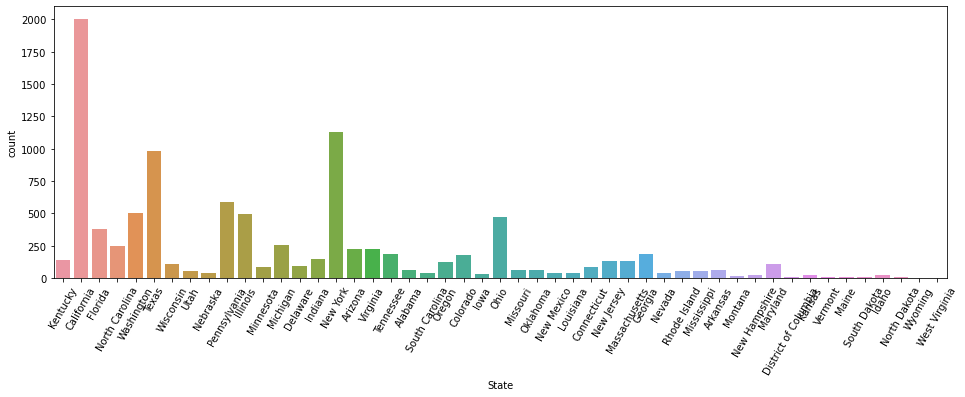

In [11]:
plt.figure(figsize=(16,5))
sns.countplot(x='State',data=data)
plt.xticks(rotation=60,fontsize=10)
plt.show()

C:\Users\pradip ganeshpimpare\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


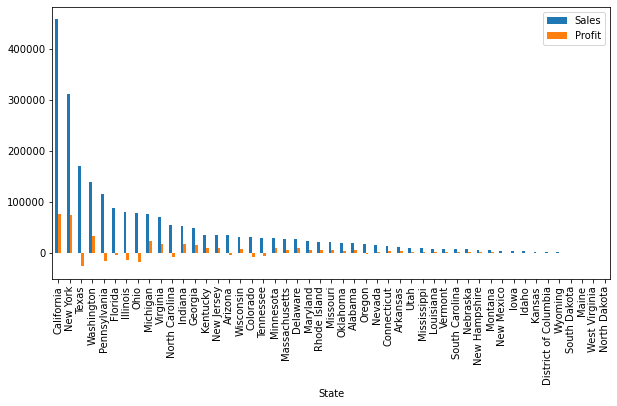

In [12]:
'''Sales & Profit as Per the States '''
df=data.groupby("State")["Sales","Profit"].sum().sort_values(by="Sales",ascending=False)
df.plot(kind='bar',figsize=(10,5))
#plt.xticks(rotation=45)
plt.show()

In [13]:
# we can see that California & New York has maximum sales and profit . 
#There are some states in  which  profit in minus it means ther are going in loss

In [14]:
data.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [15]:
df=data.groupby('Region').sum()
df.reset_index(inplace=True)
df

,Region,Postal Code,Sales,Quantity,Discount,Profit
0,Central,151786150,501239.8908,8780,558.34,39706.3625
1,East,50171698,678781.2400,10618,414.00,91522.7800
2,South,55875052,391721.9050,6209,238.55,46749.4303
3,West,293739752,725457.8245,12266,350.20,108418.4489


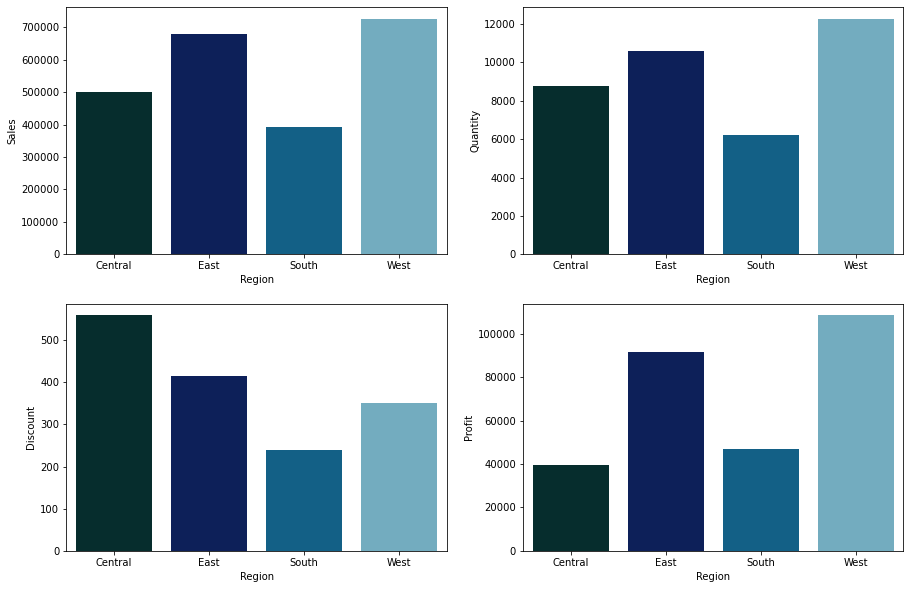

In [16]:
fig,axs=plt.subplots(2,2,figsize=(15,10)) # sales ,Profit ,Quantity of product sales as per the Region wise
sns.barplot(x='Region',y='Sales',data=df,palette='ocean',ax=axs[0,0])
sns.barplot(x='Region',y='Quantity',data=df,palette='ocean',ax=axs[0,1])
sns.barplot(x='Region',y='Discount',data=df,palette='ocean',ax=axs[1,0])
sns.barplot(x='Region',y='Profit',data=df,palette='ocean',ax=axs[1,1])
plt.show()

In [17]:
data.Category.unique() # categories of the products in supermarket

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

[]

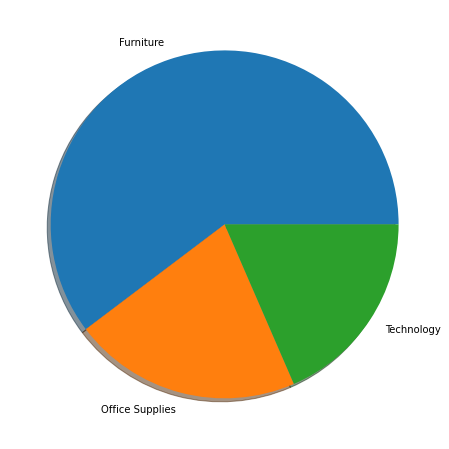

In [18]:
plt.figure(figsize=(10 , 8))
size=data.Category.value_counts()
labels=['Furniture', 'Office Supplies', 'Technology']
explode=(0,0.1)
plt.pie(size,labels=labels,shadow=True) 
plt.plot()

In [19]:
size=data.groupby('Category')['Sales','Profit'].sum() # sales and profit as per the category wise
size.reset_index(inplace=True)
size

C:\Users\pradip ganeshpimpare\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Category,Sales,Profit
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008
2,Technology,836154.0330,145454.9481


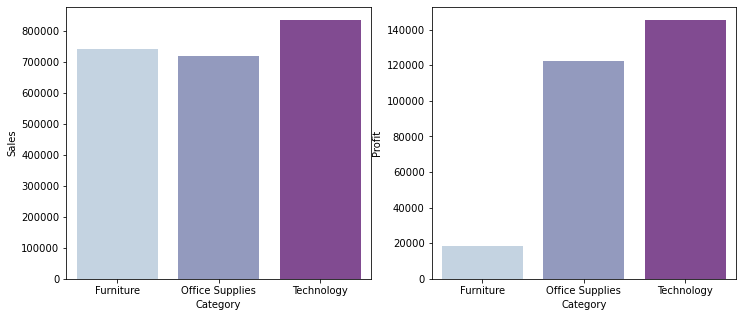

In [20]:
'''Plots for Sales & Profit For Category of Products'''
fig,axs=plt.subplots(1,2,figsize=(12,5))
sns.barplot(x='Category',y='Sales',data=size,palette='BuPu',ax=axs[0])
sns.barplot(x='Category',y='Profit',data=size,palette='BuPu',ax=axs[1])
plt.show()

In [21]:
data.Sub_Category.unique() # sub categories of the  products

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [22]:
data.Segment.unique()# there are three types of Segements 

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

[]

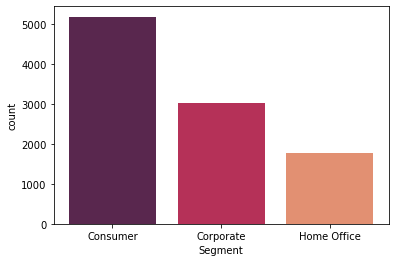

In [23]:
sns.countplot(x='Segment',data=data,palette='rocket')
plt.plot()

In [24]:
df=data.groupby(["Category","Sub_Category"])["Sales","Quantity","Profit"].sum()#  Sales ,Quantity & Profit Sub_category wise
df.reset_index(inplace=True)
df

C:\Users\pradip ganeshpimpare\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Category,Sub_Category,Sales,Quantity,Profit
0,Furniture,Bookcases,114879.9963,868,-3472.5560
1,Furniture,Chairs,328449.1030,2356,26590.1663
2,Furniture,Furnishings,91705.1640,3563,13059.1436
3,Furniture,Tables,206965.5320,1241,-17725.4811
4,Office Supplies,Appliances,107532.1610,1729,18138.0054
5,Office Supplies,Art,27118.7920,3000,6527.7870
6,Office Supplies,Binders,203412.7330,5974,30221.7633
7,Office Supplies,Envelopes,16476.4020,906,6964.1767
8,Office Supplies,Fasteners,3024.2800,914,949.5182
9,Office Supplies,Labels,12486.3120,1400,5546.2540


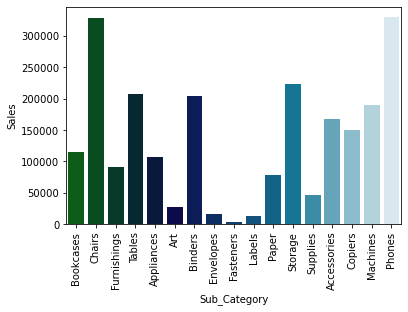

In [25]:
#sales ,Profit ,Quantity of product sales as per the Region wise

sns.barplot(x='Sub_Category',y='Sales',data=df,palette='ocean')
plt.xticks(rotation=90)
plt.show()

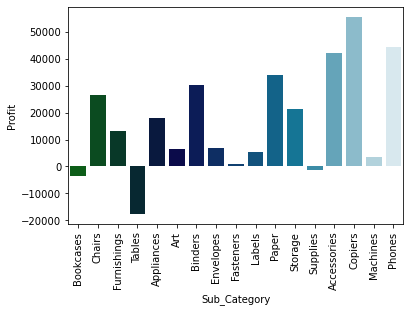

In [26]:
sns.barplot(x='Sub_Category',y='Profit',data=df,palette='ocean')
plt.xticks(rotation=90)
plt.show()

In [31]:
df=data.groupby('Segment').sum()
df.reset_index(inplace=True)
df

,Segment,Postal Code,Sales,Quantity,Discount,Profit
0,Consumer,288878609,1.161401e+06,19521,820.91,134119.2092
1,Corporate,164536330,7.061464e+05,11608,477.85,91979.1340
2,Home Office,98157713,4.296531e+05,6744,262.33,60298.6785


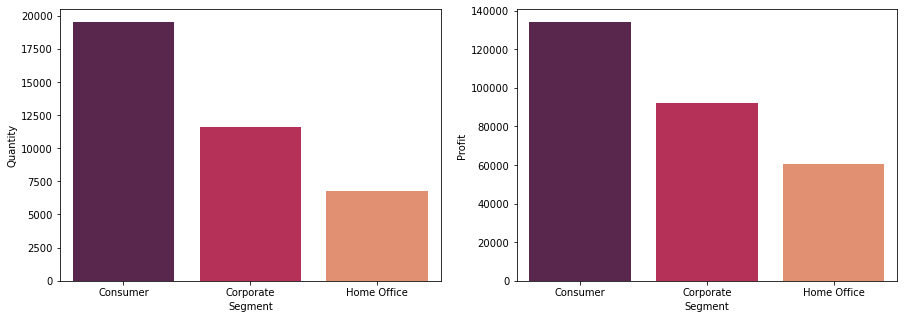

In [38]:
fig,axe=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Segment',y='Quantity',data=df,palette='rocket',ax=axe[0])
sns.barplot(x='Segment',y='Profit',data=df,palette='rocket',ax=axe[1])
plt.show()